### Import reqiured libaries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Import Data

In [117]:
penguin_data = pd.read_csv('/content/drive/MyDrive/Intern-Assignment/randomwalk-ds-assessment-level2-main/dataset.csv')
penguin_data.tail(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
334,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male
335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female
336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male
337,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female
338,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,unknown


### Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [118]:
#checking for missing data
penguin_misssing_data=penguin_data.isnull().sum()
penguin_misssing_data

,0
species,0
island,0
bill_length_mm,7
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,16


In [119]:
# Preprocessing the data

# Dropping rows where critical features are missing
critical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
updated_penguin_data = penguin_data.dropna(subset=critical_features)
updated_penguin_data.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,14


In [120]:
# Correcting the improper data
# Convert the Sex column to Numerical
updated_penguin_data['sex']= updated_penguin_data['sex'].map({'male': 0, 'female': 1,'unknown':0})
#Drop missing values
updated_penguin_data=updated_penguin_data.dropna(subset=['sex'])

<ipython-input-120-6ed2d4a50935>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_penguin_data['sex']= updated_penguin_data['sex'].map({'male': 0, 'female': 1,'unknown':0})


In [121]:
# Display summary of missing data
updated_penguin_data.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [122]:
updated_penguin_data.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,0.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,1.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,0.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,0.0
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,0.0


### Q2: What is the average body_mass_g for Gentoo penguins?

In [124]:
# Calculate the average body mass for Gentoo penguins
gentoo_avg_body_mass = updated_penguin_data[updated_penguin_data['species'] == 'Gentoo']['body_mass_g'].mean()

gentoo_avg_body_mass


5159.151785714285

### Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species?
**Explaination:**

Skewness

Definition: Skewness measures the degree of asymmetry in a distribution.

Interpretation:
Zero skewness: Perfect symmetry

Positive skewness: Long tail on the right.

Negative skewness: Long tail on the left.

Range of values: Skewness values range from -∞ to +∞

Kurtosis

Definition: Kurtosis measures the degree of peakedness or flatness of a distribution.

Interpretation:

Zero kurtosis: Perfect normality.

Positive kurtosis: More peaked distribution.

Negative kurtosis: More flat distribution.

Range of values: Kurtosis values range from -∞ to +∞



In [125]:
# Group by species and calculate skewness and kurtosis for bill_length_mm and bill_depth_mm
skewness_kurtosis = updated_penguin_data.groupby('species').agg(
    bill_length_skewness=('bill_length_mm', 'skew'),
    bill_depth_skewness=('bill_depth_mm', 'skew'),
    bill_length_kurtosis=('bill_length_mm', lambda x: x.kurtosis()),
    bill_depth_kurtosis=('bill_depth_mm', lambda x: x.kurtosis())
)
skewness_kurtosis


,bill_length_skewness,bill_depth_skewness,bill_length_kurtosis,bill_depth_kurtosis
species,,,,
Adelie,0.149406,0.308160,-0.109419,-0.053058
Chinstrap,-0.091642,0.002953,0.062408,-0.876572
Gentoo,0.651099,0.328985,1.270924,-0.558275


### Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.
**Explaination:**
Calculate the first quartile (Q1): Find the 25th percentile of the data, which represents the lower quartile.

Calculate the third quartile (Q3): Find the 75th percentile of the data, which represents the upper quartile.

Calculate the Interquartile Range (IQR): Subtract Q1 from Q3 to obtain the IQR, which represents the middle 50% of the data.

Define the lower and upper bounds: Calculate the lower bound (LB) as Q1 - 1.5IQR and the upper bound (UB) as Q3 + 1.5IQR.

Identify outliers: Any data points that fall below the LB or above the UB are considered outliers

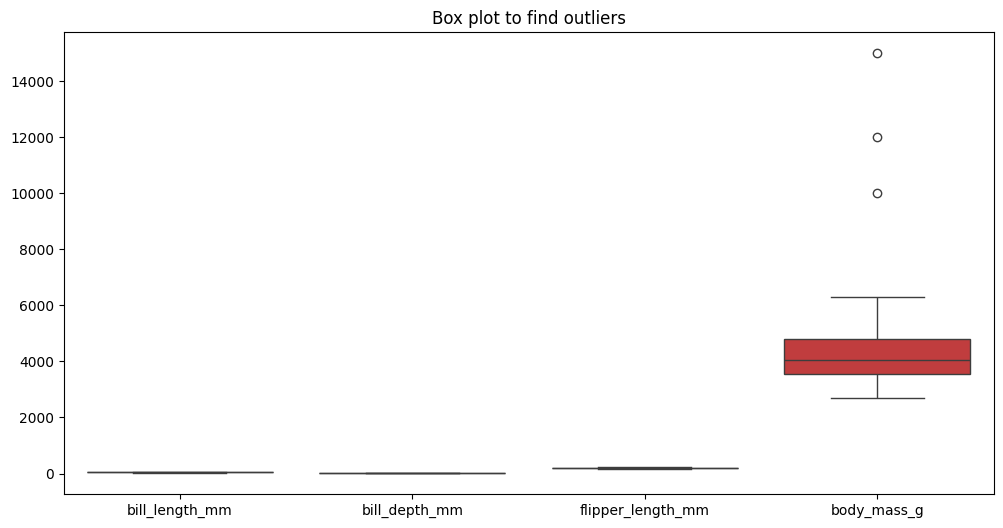

,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,3


In [126]:
# Using the IQR method to find outliers
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Q1 = updated_penguin_data[numeric_cols].quantile(0.25)
Q3 = updated_penguin_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((updated_penguin_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (updated_penguin_data[numeric_cols] > (Q3 + 1.5 * IQR)))

# Visualize outliers with box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=updated_penguin_data[numeric_cols])
plt.title('Box plot to find outliers')
plt.show()

outliers.sum()  # Count of outliers

### Q5: Does this dataset contribute to the curse of dimensionality? If yes, perform PCA.

**Explaination:**

The dataset has a low number of features, the curse of dimensionality may not occur in this dataset.

The dataset has only a few features and they are not highly correlated, PCA might not be required.

**Prefered not to do PCA for this dataset but  we can do PCA if we need to further reduce dimensionality for any cause.**

In [127]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
x = StandardScaler().fit_transform(updated_penguin_data[features])

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Explained_variance to check if PCA is useful
variance = pca.explained_variance_ratio_
variance

array([0.61557234, 0.19748104])

### Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs.

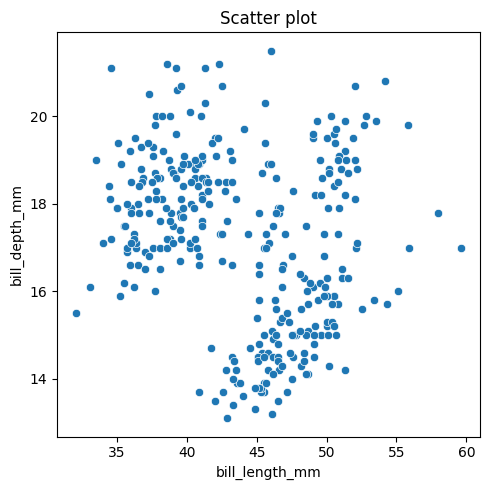

In [128]:
plt.figure(figsize=(5, 5))

# Scatter plot
sns.scatterplot(data=updated_penguin_data, x='bill_length_mm', y='bill_depth_mm')
plt.title('Scatter plot')
plt.tight_layout()
plt.show()



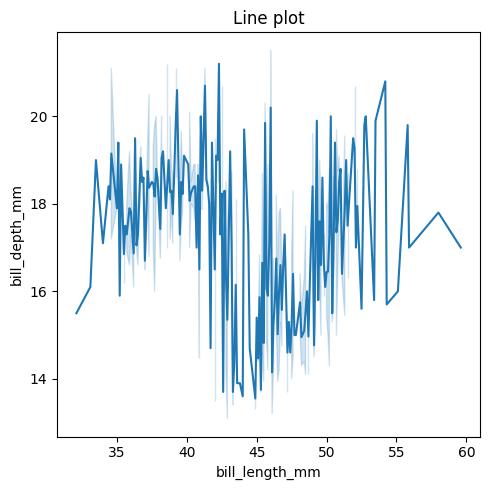

In [129]:
# Line plot
plt.figure(figsize=(5, 5))
sns.lineplot(data=updated_penguin_data, x='bill_length_mm', y='bill_depth_mm')
plt.title('Line plot')
plt.tight_layout()
plt.show()

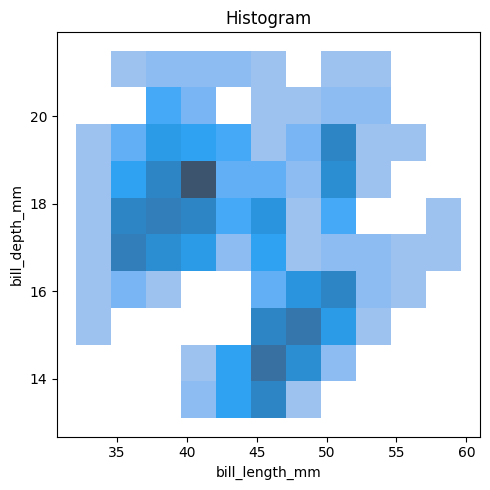

In [130]:
# Histogram
plt.figure(figsize=(5, 5))
sns.histplot(data=updated_penguin_data, x='bill_length_mm', y='bill_depth_mm')
plt.title('Histogram')
plt.tight_layout()
plt.show()

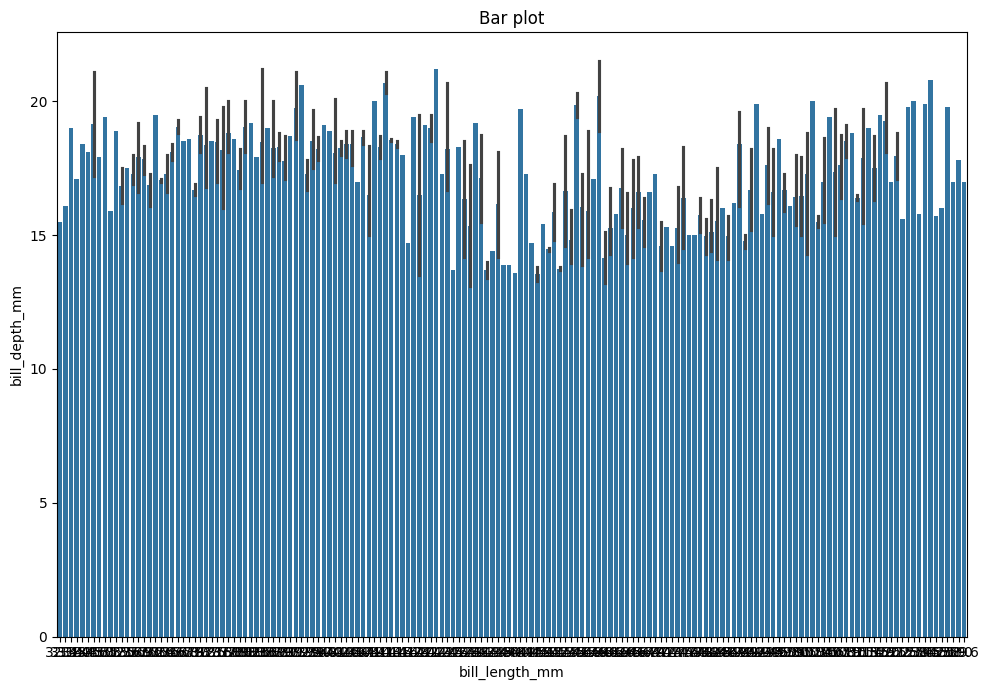

In [131]:
# Bar plot
plt.figure(figsize=(10, 7))
sns.barplot(data=updated_penguin_data, x='bill_length_mm', y='bill_depth_mm')
plt.title('Bar plot')
plt.tight_layout()
plt.show()

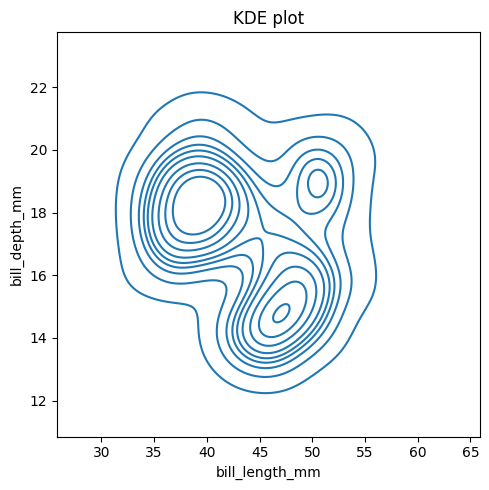

In [132]:
# KDE plot
plt.figure(figsize=(5, 5))
sns.kdeplot(data=updated_penguin_data, x='bill_length_mm', y='bill_depth_mm')
plt.title('KDE plot')
plt.tight_layout()
plt.show()

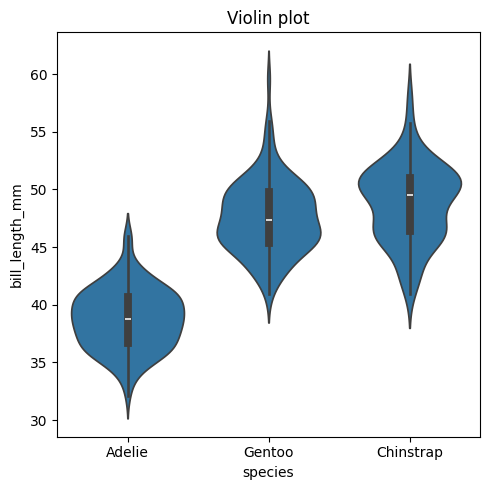

In [133]:
# Violin plot
plt.figure(figsize=(5, 5))
sns.violinplot(data=updated_penguin_data, x='species', y='bill_length_mm')
plt.title('Violin plot')
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

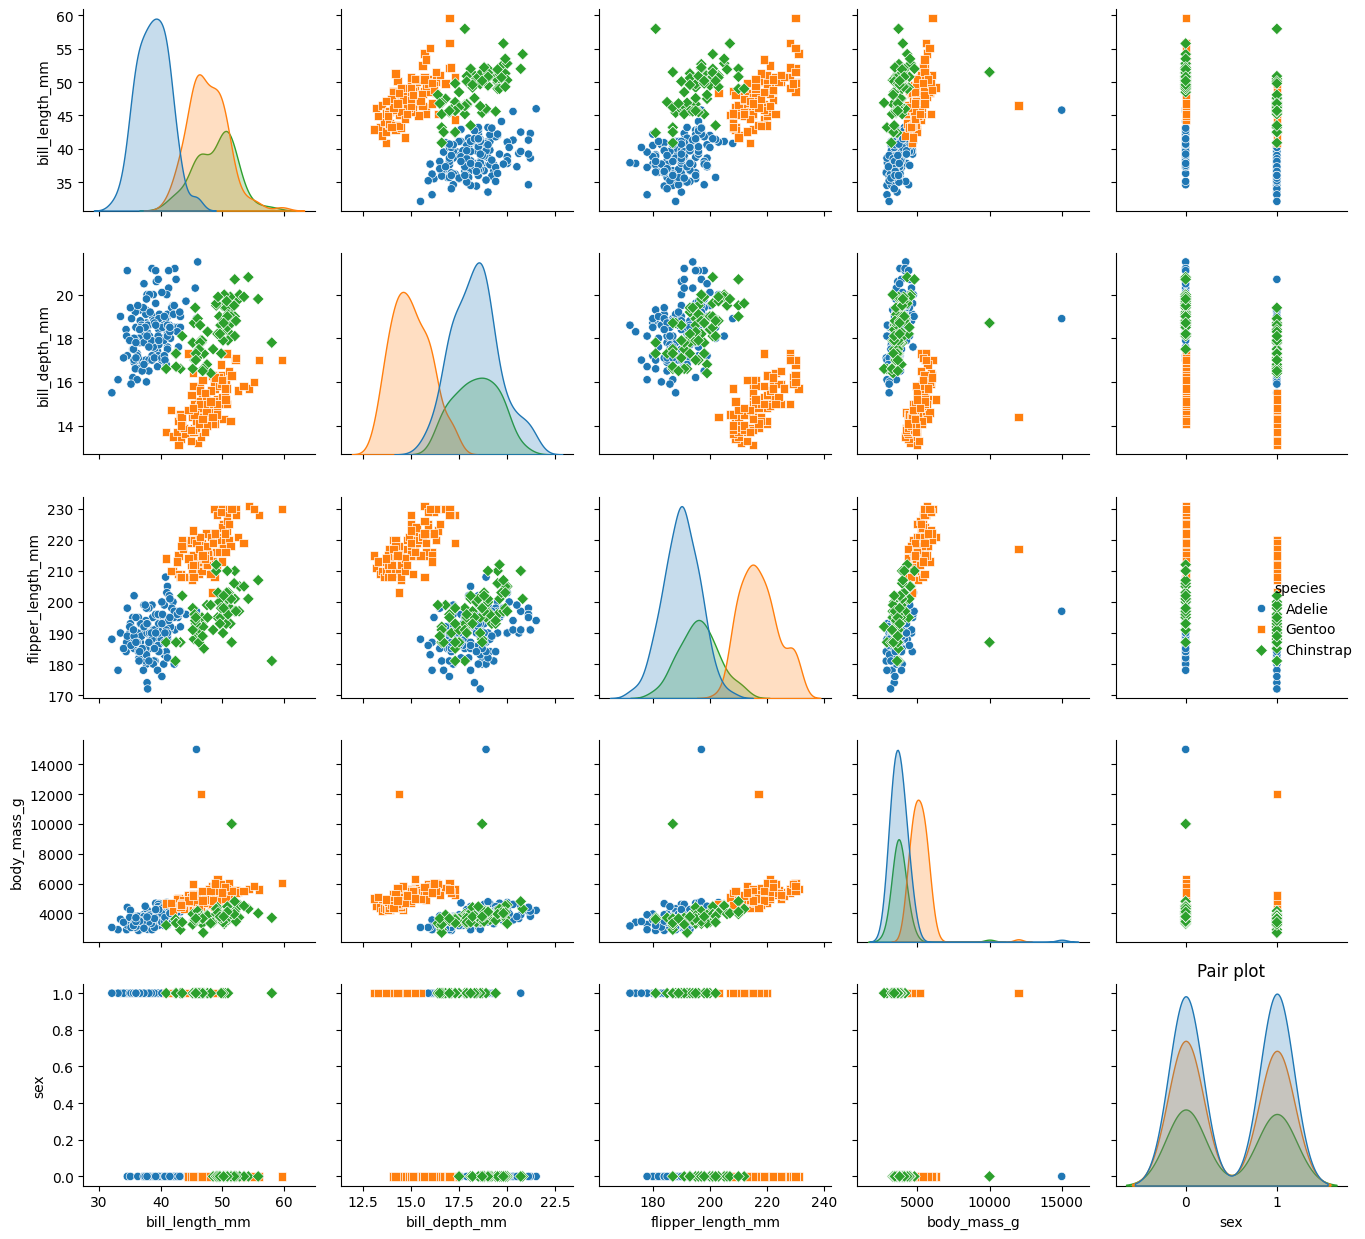

In [134]:
# Pair plot
plt.figure(figsize=(5, 5))
sns.pairplot(updated_penguin_data, hue='species', markers=["o", "s", "D"])
plt.title('Pair plot')
plt.tight_layout()
plt.show()

### Q7: Find the maximum flipper_length_mm for each combination of species and island.

In [135]:
# Finding the max_flipper_length
max_flipper_length = updated_penguin_data.groupby(['species', 'island'])['flipper_length_mm'].max()

max_flipper_length

species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    202.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64

### Q8: Perform z-score normalization on this dataset.

In [136]:
from scipy.stats import zscore

# Applying z-score normalization
zscore_normalized_data = updated_penguin_data.copy()
zscore_normalized_data[features] = zscore(updated_penguin_data[features])

zscore_normalized_data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.873115,0.768343,-1.415643,-0.459514,0.0
1,Adelie,Torgersen,-0.800309,0.104774,-1.056111,-0.415366,1.0
2,Adelie,Torgersen,-0.654696,0.411037,-0.408954,-0.900986,1.0
4,Adelie,Torgersen,-1.309955,1.074606,-0.552767,-0.724397,1.0
5,Adelie,Torgersen,-0.836712,1.738175,-0.768486,-0.547808,0.0
